## Logistic(Binary) Classification : PyTorch

In [ ]:
import torch 
import torch.nn as nn
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### Step 1. Data  - target 0 or 1

In [ ]:
x_data = torch.FloatTensor([[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]])
y_data = torch.FloatTensor([[0],
          [0],
          [0],
          [1],
          [1],
          [1]])

### Plot the data

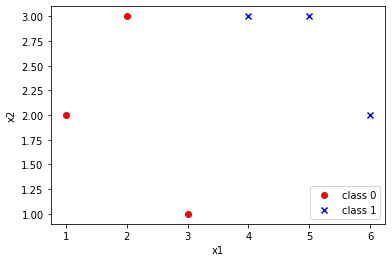

In [ ]:
plt.scatter(x_data[:3, 0], x_data[:3, 1],
            color='red', marker='o', label='class 0')
plt.scatter(x_data[3:, 0], x_data[3:, 1],
            color='blue', marker='x', label='class 1')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='lower right')
plt.show()

### Step 2. Logistic Classification Model (input = 2, output = 1 with sigmoid function)

In [ ]:
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel,self).__init__()
        self.LogisticRM = nn.Sequential(
          nn.Linear(2,1),
          nn.Sigmoid()
        )
    def forward(self,x):
        y_pred = self.LogisticRM(x)
        return y_pred

model = LogisticRegressionModel()

### Step 3. Loss and Optimizer

In [ ]:
criterion = torch.nn.BCELoss(reduction='sum' )
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)

### Step 4. Train the model

In [ ]:
epochs = 1000
cost = []
for epoch in range(epochs):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    cost.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
      
    if epoch % 100 == 0:
        prediction = y_pred >= torch.FloatTensor([0.5])
        correct_prediction = prediction.float() == y_data
        accuracy = correct_prediction.sum().item() / len(correct_prediction)
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
            epoch, epochs, loss.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 5.121399 Accuracy 50.00%
Epoch  100/1000 Cost: 1.166363 Accuracy 100.00%
Epoch  200/1000 Cost: 0.734921 Accuracy 100.00%
Epoch  300/1000 Cost: 0.538063 Accuracy 100.00%
Epoch  400/1000 Cost: 0.425642 Accuracy 100.00%
Epoch  500/1000 Cost: 0.352751 Accuracy 100.00%
Epoch  600/1000 Cost: 0.301539 Accuracy 100.00%
Epoch  700/1000 Cost: 0.263518 Accuracy 100.00%
Epoch  800/1000 Cost: 0.234136 Accuracy 100.00%
Epoch  900/1000 Cost: 0.210727 Accuracy 100.00%


Print the updated weight W and bias b

In [ ]:
for param in model.parameters():
  print(param)

Parameter containing:
tensor([[2.7953, 1.2646]], requires_grad=True)
Parameter containing:
tensor([-12.3474], requires_grad=True)


Plot the Training loss

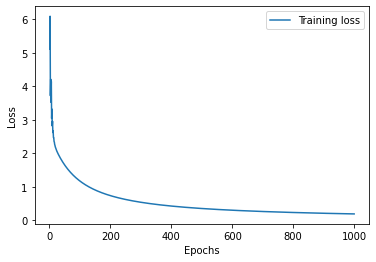

In [ ]:
epochs = np.arange(1, epochs+1)
plt.plot(epochs, cost, label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Step 5. Test

In [ ]:
x_test = torch.FloatTensor([[2, 1], [6, 5]])
with torch.no_grad():
  y_pred = model(x_test)  # predicted output

prediction = y_pred >= torch.FloatTensor([0.5])
print(x_test)
print(prediction.float())

tensor([[2., 1.],
        [6., 5.]])
tensor([[0.],
        [1.]])


### Plot the Test Results & Decision Boundary

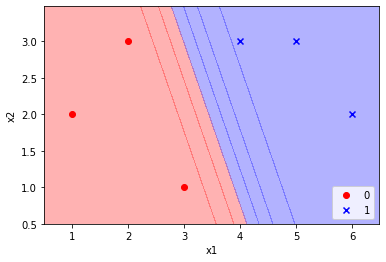

In [ ]:
plt.scatter(x_data[:3, 0], x_data[:3, 1],
            color='red', marker='o', label='0')
plt.scatter(x_data[3:, 0], x_data[3:, 1],
            color='blue', marker='x', label='1')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='lower right')

resolution=0.02
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:2])
x1_min, x1_max = x_data[:, 0].min() - 0.5, x_data[:, 0].max() + 0.5
x2_min, x2_max = x_data[:, 1].min() - 0.5, x_data[:, 1].max() + 0.5
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

x_test = torch.FloatTensor([xx1.ravel(), xx2.ravel()]).transpose(0, 1)
with torch.no_grad():
  y_pred = model(x_test)  # predicted output

Z = y_pred.view(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)